In [23]:
import numpy as np
import pandas as pd
import random


import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Rectangle
import seaborn as sns

import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import brier_score_loss

In [2]:
pkl_file = open('colab_pkls/new_df.pkl', 'rb')
df = pickle.load(pkl_file)
pkl_file.close()

In [431]:
def uns_plot(df):
    
    plt.figure(figsize = [8,8])
    plt.scatter(df[df['log_best']>0]['log_best_abs_diff'], df[df['log_best']>0]['pred_log_best_var'], c = df[df['log_best']>0]['pred_log_best_mean'], alpha = 0.4, label = '$ŷ_{μ}$')

    plt.xlabel('|$y - ŷ_{μ}$|', fontsize = 20)
    plt.ylabel('$ŷ_{σ}$', fontsize = 20)

    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)


    sns.despine()
    plt.legend(fontsize = 20)
    
    fig_title = 'uns_plot.pdf'
    plt.savefig(fig_title, bbox_inches="tight")
    
    plt.show()

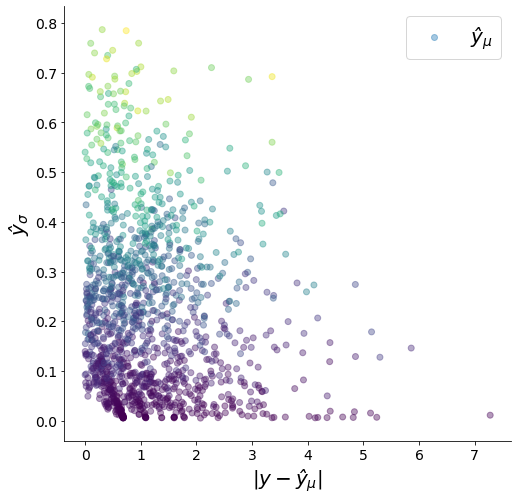

In [432]:
uns_plot(df)

In [424]:
def my_sigmoid(x):
    s  = 1/(1 + np.e **(-x))
    return(s)

y_score = df['pred_log_best_mean']
y_score_prob = my_sigmoid(y_score)

y_true = df['log_best']
y_true_binary = (y_true > 0) * 1

print('Unet')

print(mean_squared_error(y_true, y_score))
print(average_precision_score(y_true_binary, y_score_prob))
print(roc_auc_score(y_true_binary, y_score_prob))
print(brier_score_loss(y_true_binary, y_score_prob))

Unet
0.017757689788680663
0.6800567560051984
0.9838647400924473
0.2532155842366542


In [483]:
y_random_prob = np.random.rand(y_true.shape[0])

y_random * 8

print(mean_squared_error(y_true, y_random))
print(average_precision_score(y_true_binary, y_random_prob))
print(roc_auc_score(y_true_binary, y_random_prob))
print(brier_score_loss(y_true_binary, y_random_prob))

0.3658879187784011
0.005191328117818189
0.490267036063586
0.33379071877391414


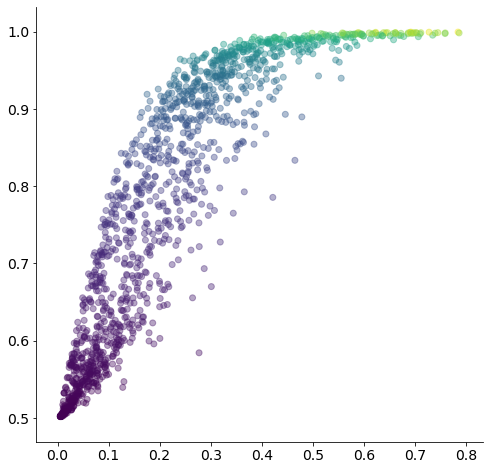

In [430]:
plt.figure(figsize = [8,8])
plt.scatter(df[df['log_best']>0]['pred_log_best_var'], y_score_prob[df['log_best']>0],  c = df[df['log_best']>0]['pred_log_best_mean'], alpha = 0.4)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

sns.despine()
# plt.legend(fontsize = 20)

plt.show()

In [13]:
def my_plot(feature, title = 'title..'):
    
    if feature == 'pred_log_best_var':
        min_ = round(df['pred_log_best_var'].min())
        max_ = round(df['pred_log_best_var'].max())
    
    
    else:
        min_ = round(df[['log_best', 'pred_log_best_mean', 'pred_log_best_var', 'log_best_abs_diff']].min().min())
        max_ = round(df[['log_best', 'pred_log_best_mean', 'pred_log_best_var', 'log_best_abs_diff']].max().max())
    
    plt.figure(figsize = [24,8])
    plt.scatter(df['xcoord'], df['ycoord'], c = df[feature], s=1, marker='s', vmin=min_, vmax=max_)
    
    cbar = plt.colorbar()
    for t in cbar.ax.get_yticklabels():
        t.set_fontsize(22)
    
    plt.xticks([])
    plt.yticks([])
    
    plt.xlim(-180,180)
    plt.ylim(-60,85)
            
    sns.despine(bottom=True, left = True)
    
    fig_title = f'{feature}_map.pdf'
    plt.savefig(fig_title, bbox_inches="tight")
    
    plt.show()
    

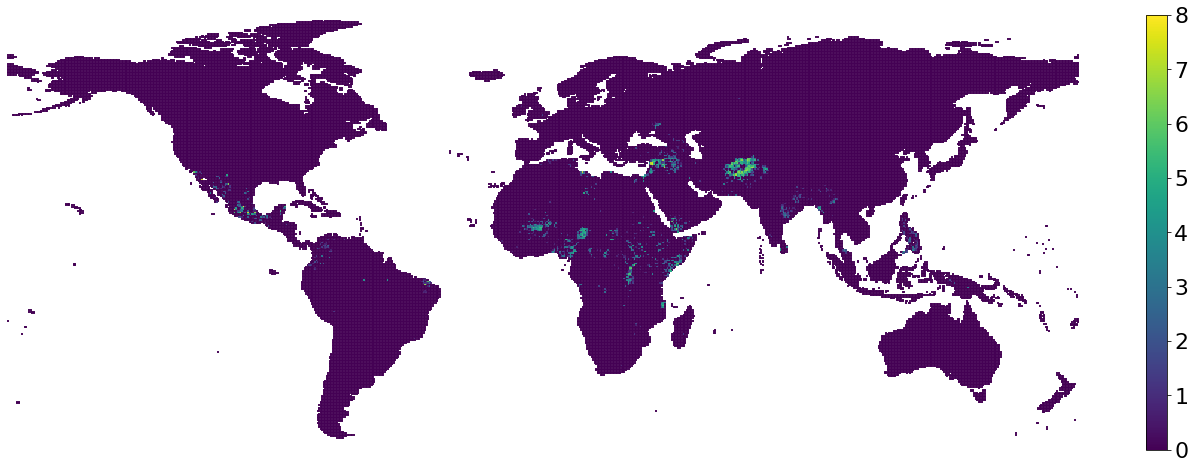

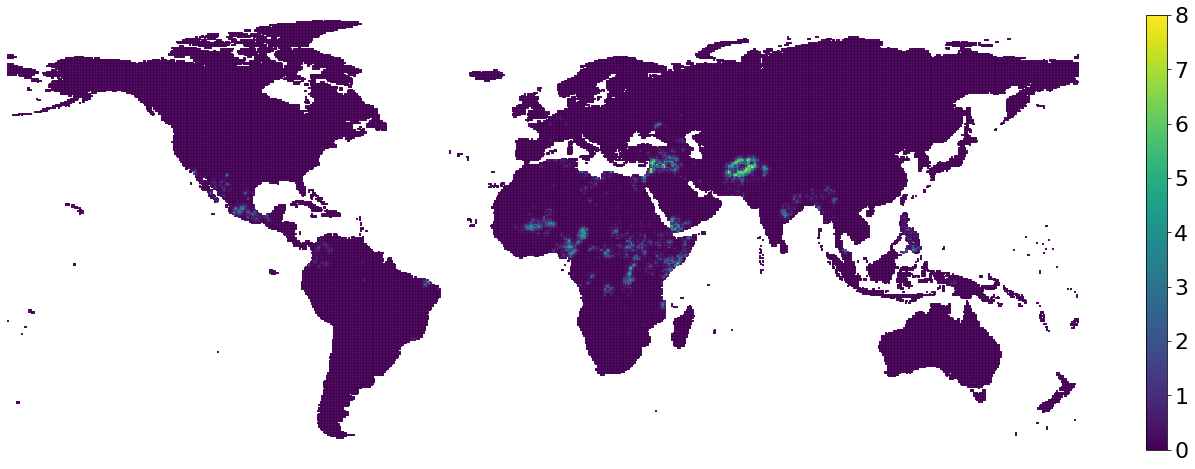

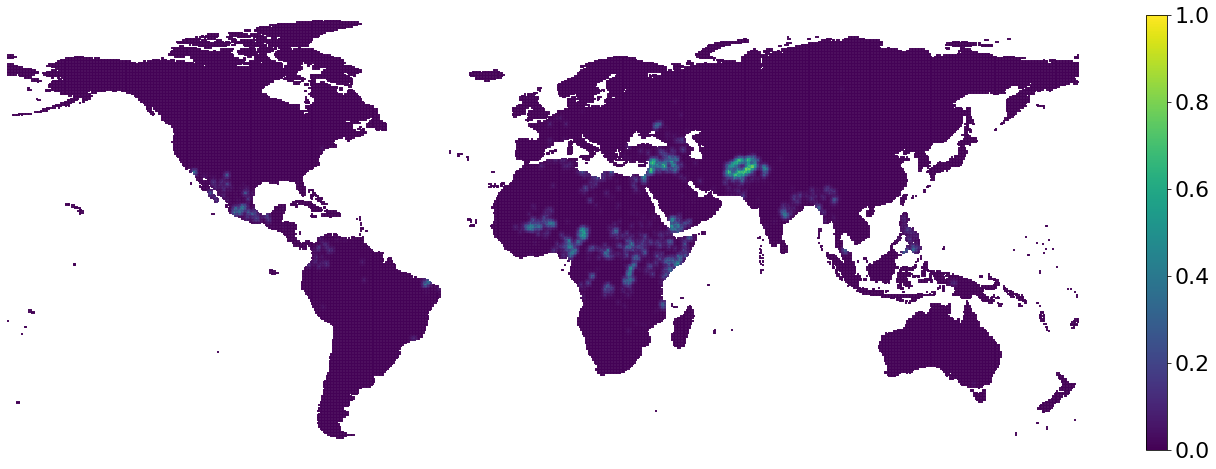

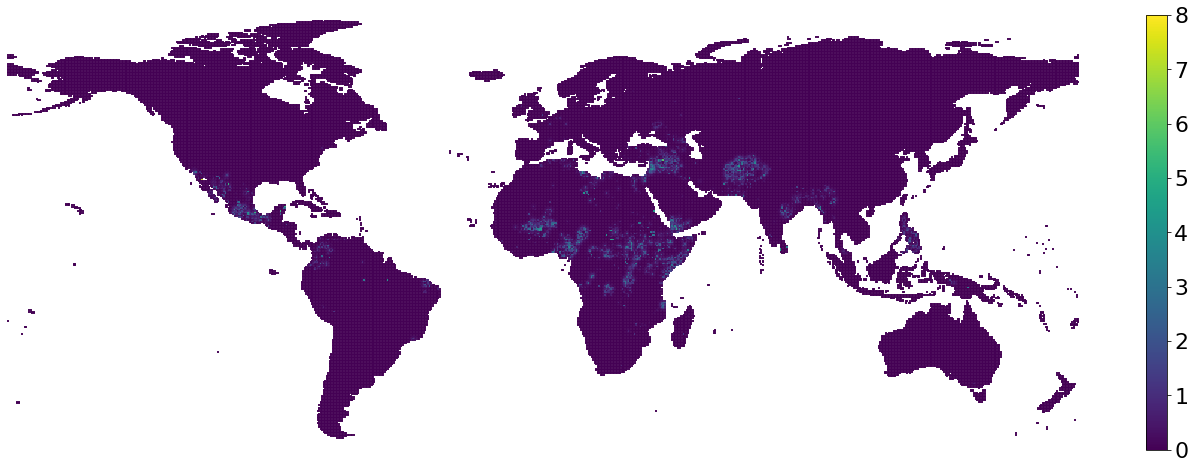

In [14]:
features = ['log_best', 'pred_log_best_mean', 'pred_log_best_var', 'log_best_abs_diff']

for f in features:
    my_plot(f)

olormap tr is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

# other stuff

In [16]:
pkl_file = open('ucpd_vol.pkl', 'rb')
ucpd_vol = pickle.load(pkl_file)
pkl_file.close()

In [289]:
def draw_windows(draws = 100, dim = 16, min_events = 10, ucpd_vol = ucpd_vol):


    ucpd_vol_count = np.count_nonzero(ucpd_vol[:,:,:,4], axis = 0)
    nonzero = np.where(ucpd_vol_count >= min_events) # number of events so >= 1 or >0 is the same as np.nonzero

    nonzero_row = nonzero[0]
    nonzero_col = nonzero[1]

    nonzero_coord = [(row, col) for row, col in zip(nonzero_row, nonzero_col)]
    
    h = ucpd_vol.shape[1]
    w = ucpd_vol.shape[2]
    
    sub_images_y = []
    sub_images_x = []
    
    for i in range(draws):
    
        coord = random.choice(nonzero_coord)

        new_y = np.random.randint(coord[0]-dim/2,coord[0]+dim/2)
        max_y = int(new_y + (dim/2))
        min_y = int(new_y - (dim/2))

        new_x = np.random.randint(coord[1]-dim/2,coord[1]+dim/2)
        max_x =  int(new_x + (dim/2))
        min_x = int(new_x - (dim/2))

        sub_images_y.append((min_y,max_y))
        sub_images_x.append((min_x,max_x))
    
    return(sub_images_y,sub_images_x)
    

In [387]:
dim = 16
draws = 9
sub_images_y,sub_images_x = draw_windows(draws = draws, dim = dim, min_events = 8, ucpd_vol = ucpd_vol) # right now can only be 16 becasue of def init_he0s(self):

In [393]:
# save good draw for viz:

# file_name = "colab_pkls/sub_images_y.pkl"
# output = open(file_name, 'wb')
# pickle.dump(sub_images_y, output)
# output.close()

# file_name = "colab_pkls/sub_images_x.pkl"
# output = open(file_name, 'wb')
# pickle.dump(sub_images_x, output)
# output.close()

# load good draw for viz:

pkl_file = open('colab_pkls/sub_images_y.pkl', 'rb')
sub_images_y = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('colab_pkls/sub_images_x.pkl', 'rb')
sub_images_x = pickle.load(pkl_file)
pkl_file.close()

In [398]:
def rect_plot(sub_images_y, sub_images_x, draws):
    
    plt.figure(figsize = [15,15])
    plt.imshow(ucpd_vol[-2,:,:,4])

    for i in range(draws):
        left, bottom, width, height = (sub_images_x[i][0], sub_images_y[i][0], 16, 16)
        rect = Rectangle((left, bottom), width, height, facecolor="none", edgecolor='red', lw=1)
        plt.gca().add_patch(rect) 

        plt.xticks([])
        plt.yticks([])

        sns.despine(left = True, bottom= True)
        
    fig_title = 'rect_plot.pdf'
    plt.savefig(fig_title, bbox_inches="tight")

    plt.show()

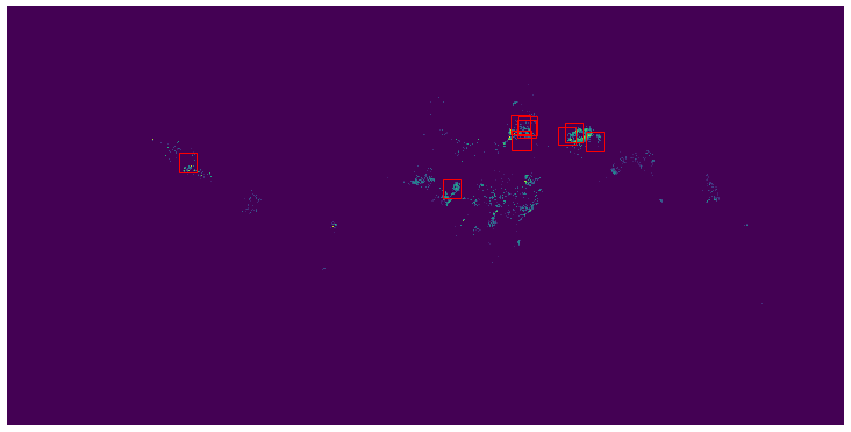

In [399]:
rect_plot(sub_images_y,sub_images_x, draws)

In [434]:
def window_plot(sub_images_y, sub_images_x, draws, t):
    plt.figure(figsize = [5,5])

    for i in range(draws):
        plt.subplot(3,3,i+1)
        plt.imshow(ucpd_vol[-t, sub_images_y[i][0]:sub_images_y[i][1], sub_images_x[i][0]:sub_images_x[i][1], 4])
        plt.xticks([])
        plt.yticks([])

        sns.despine(left = True, bottom= True)
        
    fig_title = f'window_plot_t{t}.pdf'
    plt.savefig(fig_title, bbox_inches="tight")

    plt.show()

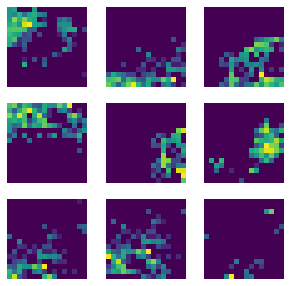

In [435]:
window_plot(sub_images_y,sub_images_x, draws, 3)

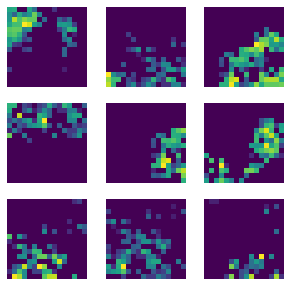

In [436]:
window_plot(sub_images_y,sub_images_x, draws, 2)